<a href="https://colab.research.google.com/github/juhi2811/DeepFashion/blob/df_v1/Multi_output_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install tensorflow-estimator==2.1.*

     |████████████████████████████████| 448 kB 12.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0


In [ ]:
!pip install webcolors

In [ ]:
!pip install colorthief

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skimage import io
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from colorthief import ColorThief
import scipy
from scipy.spatial import KDTree
from webcolors import CSS3_HEX_TO_NAMES,hex_to_rgb
from PIL import Image, ImageFont, ImageDraw
import random
import pathlib
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#os.listdir("gdrive/MyDrive")

In [ ]:
df_images=pd.DataFrame(columns=["image_folder","image_name"])


In [ ]:
folders_images=["gdrive/MyDrive/img/"+f for f in os.listdir("gdrive/MyDrive/img") if "." not in f]

In [ ]:
len(folders_images)

5592

In [ ]:
for l in folders_images:
  if len(l)>0:
    df_append=pd.DataFrame(columns=["image_folder","image_path"])
    df_append["image_folder"]=[l for idx in range(len(os.listdir(l)))]
    df_append["image_name"]=os.listdir(l)
    df_images=df_images.append(df_append,ignore_index=True)

In [ ]:
df_images["image_path"]=df_images["image_folder"]+"/"+df_images["image_name"]

In [ ]:
df_images["item_class"]=df_images["image_path"].apply(lambda x: x.split("/")[-2].split("_")[-1])
df_images["design_class"]=df_images["image_path"].apply(lambda x: x.split("/")[-2].split("_")[-2])
df_images["design_pre"]=df_images["image_path"].apply(lambda x: [x.split("/")[-2].split("_")[-3] if len(x.split("/")[-2].split("_"))>3 else ""][0])
df_images["design_type"]=df_images["design_pre"]+" "+df_images["design_class"]

Triangle_Print_Chiffon_Blouse


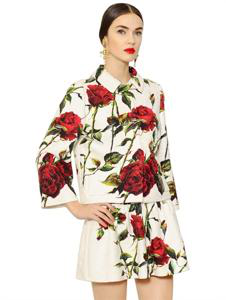

In [ ]:
print(list(df_images[df_images["item_class"]=="Blouse"]["image_path"])[1].split("/")[3])
PIL.Image.open(list(df_images[df_images["design_type"].str.contains("Rose")]["image_path"])[34])
#list(df_images[df_images["item_class"]=="Jumpsuit"]["image_path"])[3].split("/")[3]

In [ ]:

def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'

In [ ]:
color_thief = ColorThief(list(df_images[df_images["item_class"]=="Hoodie"]["image_path"])[2])
# get the dominant color
dominant_color = color_thief.get_color(quality=1)

In [ ]:
closest_dominant_name=convert_rgb_to_names(dominant_color)
closest_dominant_name

'closest match: darkslategray'

In [ ]:
tops=['Cardigan', 'Tee', 'Top', 'Sweater', 'Halter',
       'Tank', 'Hoodie', 'Blazer', 'Jacket',
       'Blouse', 'Coat', 
        'Button-Down','Turtleneck', 'Kaftan', 'Flannel',
       'Parka', 'Henley', 'Poncho', 'Jersey',
       'Anorak', 'Jodhpurs', 'Caftan']
bottoms=['Skirt', 'Leggings', 'Sweatpants', 
       'Shorts', 'Jeans', 'Joggers',   'Chinos',
       'Cutoffs', 'Culottes', 
       'Jeggings', 'Sweatshorts', 'Capris', 'Trunks',
       'Gauchos']
one_pieces=['Dress',
       'Kimono', 'Jumpsuit', 'Coverup', 'Robe', 'Onesie','Romper']
formals=['Blazer','Blouse','Jumpsuit','Turtleneck','Skirt','Dress','Coat','Chinos']
casuals=[ 'Tee', 'Top', 'Sweater', 'Halter',   'Jacket',
        'Button-Down','Kaftan', 'Flannel',
       'Parka', 'Henley', 'Poncho','Anorak', 'Jodhpurs', 'Caftan','Leggings','Sweatpants', 
       'Shorts', 'Jeans', 
       'Cutoffs', 'Culottes', 
       'Jeggings', 'Sweatshorts', 'Capris', 'Trunks',
       'Gauchos','Kimono','Onesie','Coverup','Romper']
# spring=["Dress","Jumpsuit","Skirt"]
sporty=['Hoodie','Tank','Jersey','Joggers',  'Hoodie']
df_images["dress_type"]=df_images["item_class"].apply(lambda x: ["top" if x in tops else "bottom" if x in bottoms else "one_piece"][0])
df_images["dress_ocassion"]=df_images["item_class"].apply(lambda x: ["sporty" if x in sporty else "formal" if x in formals else "casual"][0])
df_images["broad_design"]=df_images["design_type"].apply(lambda x: ["Print" if ("print" in x.lower() or "floral" in x.lower() or "dot" in x.lower() or "embroidere" in x.lower() or "stripe" in x.lower() or "boxy" in x.lower()) else "Washed" if ("dye" in x.lower() or "wash" in x.lower() or "tulip" in x.lower()) else "Knit" if ("knit" in x.lower() or "embroidere" in x.lower() or "woven" in x.lower() or "crochet" in x.lower() or "texture" in x.lower()) else "Classic"][0])

In [ ]:
df_images["print_type"]=df_images["design_type"].apply(lambda x: ["Dotted" if "dot" in x.lower() else "Floral" if  ("floral" in x.lower() or "embroidere" in x.lower()) else "Striped" if "stripe" in x.lower() else "Lined"  if "boxy" in x.lower() else "Graphic" if "graphic" in x.lower() else "NA"][0])
df_images["print_type"]=df_images.apply(lambda dfx: ["Other prints" if (dfx["broad_design"]=="Print" and dfx["print_type"]=="NA") else dfx["print_type"]],axis=1)

In [ ]:
len(list(df_images["design_type"].unique())[1000:])

507

In [ ]:
df_images[df_images["design_type"].str.contains("Baroque")]

,image_folder,image_name,image_path,item_class,design_class,design_pre,design_type,dress_type,dress_ocassion,broad_design,print_type
3105,gdrive/MyDrive/img/Faded_Baroque_Print_Dress,img_00000001.jpg,gdrive/MyDrive/img/Faded_Baroque_Print_Dress/i...,Dress,Print,Baroque,Baroque Print,one_piece,formal,Print,NA
3106,gdrive/MyDrive/img/Faded_Baroque_Print_Dress,img_00000041.jpg,gdrive/MyDrive/img/Faded_Baroque_Print_Dress/i...,Dress,Print,Baroque,Baroque Print,one_piece,formal,Print,NA
3107,gdrive/MyDrive/img/Faded_Baroque_Print_Dress,img_00000045.jpg,gdrive/MyDrive/img/Faded_Baroque_Print_Dress/i...,Dress,Print,Baroque,Baroque Print,one_piece,formal,Print,NA
3108,gdrive/MyDrive/img/Faded_Baroque_Print_Dress,img_00000029.jpg,gdrive/MyDrive/img/Faded_Baroque_Print_Dress/i...,Dress,Print,Baroque,Baroque Print,one_piece,formal,Print,NA
3109,gdrive/MyDrive/img/Faded_Baroque_Print_Dress,img_00000052.jpg,gdrive/MyDrive/img/Faded_Baroque_Print_Dress/i...,Dress,Print,Baroque,Baroque Print,one_piece,formal,Print,NA
...,...,...,...,...,...,...,...,...,...,...,...
165214,gdrive/MyDrive/img/Pleated_Baroque_Print_Shorts,img_00000011.jpg,gdrive/MyDrive/img/Pleated_Baroque_Print_Short...,Shorts,Print,Baroque,Baroque Print,bottom,casual,Print,NA
165215,gdrive/MyDrive/img/Pleated_Baroque_Print_Shorts,img_00000008.jpg,gdrive/MyDrive/img/Pleated_Baroque_Print_Short...,Shorts,Print,Baroque,Baroque Print,bottom,casual,Print,NA
165216,gdrive/MyDrive/img/Pleated_Baroque_Print_Shorts,img_00000013.jpg,gdrive/MyDrive/img/Pleated_Baroque_Print_Short...,Shorts,Print,Baroque,Baroque Print,bottom,casual,Print,NA
165217,gdrive/MyDrive/img/Pleated_Baroque_Print_Shorts,img_00000014.jpg,gdrive/MyDrive/img/Pleated_Baroque_Print_Short...,Shorts,Print,Baroque,Baroque Print,bottom,casual,Print,NA


In [ ]:
df_images_rel_des=pd.DataFrame()
for dt in df_images["broad_design"].unique():
  df_append=df_images[df_images["broad_design"]==dt].sample(n=10000, replace=True, random_state=44)
  df_images_rel_des=df_images_rel_des.append(df_append,ignore_index=True)
df_images_rel_des

,image_folder,image_name,image_path,item_class,design_class,design_pre,design_type,dress_type,dress_ocassion,broad_design,print_type
0,gdrive/MyDrive/img/Everyday_Linen-Blend_Tee,img_00000042.jpg,gdrive/MyDrive/img/Everyday_Linen-Blend_Tee/im...,Tee,Linen-Blend,,Linen-Blend,top,casual,Classic,[NA]
1,gdrive/MyDrive/img/Floral-Embroidered_A-Line_D...,img_00000060.jpg,gdrive/MyDrive/img/Floral-Embroidered_A-Line_D...,Dress,A-Line,,A-Line,one_piece,formal,Classic,[NA]
2,gdrive/MyDrive/img/Drape-Front_Shawl_Collar_Ja...,img_00000026.jpg,gdrive/MyDrive/img/Drape-Front_Shawl_Collar_Ja...,Jacket,Collar,Shawl,Shawl Collar,top,casual,Classic,[NA]
3,gdrive/MyDrive/img/Woven_Suit_Joggers,img_00000013.jpg,gdrive/MyDrive/img/Woven_Suit_Joggers/img_0000...,Joggers,Suit,,Suit,bottom,sporty,Classic,[NA]
4,gdrive/MyDrive/img/Boxy_Chambray_Tank_Top,img_00000028.jpg,gdrive/MyDrive/img/Boxy_Chambray_Tank_Top/img_...,Top,Tank,Chambray,Chambray Tank,top,casual,Classic,[NA]
...,...,...,...,...,...,...,...,...,...,...,...
39995,gdrive/MyDrive/img/Dotted_Tulip-Sleeve_Blouse,img_00000012.jpg,gdrive/MyDrive/img/Dotted_Tulip-Sleeve_Blouse/...,Blouse,Tulip-Sleeve,,Tulip-Sleeve,top,formal,Washed,[NA]
39996,gdrive/MyDrive/img/Clean_Wash_Slim_Jeans,img_00000026.jpg,gdrive/MyDrive/img/Clean_Wash_Slim_Jeans/img_0...,Jeans,Slim,Wash,Wash Slim,bottom,casual,Washed,[NA]
39997,gdrive/MyDrive/img/Mineral_Wash_Pencil_Skirt,img_00000007.jpg,gdrive/MyDrive/img/Mineral_Wash_Pencil_Skirt/i...,Skirt,Pencil,Wash,Wash Pencil,bottom,formal,Washed,[NA]
39998,gdrive/MyDrive/img/Floral_Tie-Dye_Dress,img_00000032.jpg,gdrive/MyDrive/img/Floral_Tie-Dye_Dress/img_00...,Dress,Tie-Dye,,Tie-Dye,one_piece,formal,Washed,[NA]


In [ ]:
df_images_rel=pd.DataFrame()
for dt in df_images["dress_type"].unique():
  df_append=df_images_rel_des[df_images_rel_des["dress_type"]==dt].sample(n=5000, replace=True, random_state=33)
  df_images_rel=df_images_rel.append(df_append,ignore_index=True)
df_images_rel

,image_folder,image_name,image_path,item_class,design_class,design_pre,design_type,dress_type,dress_ocassion,broad_design,print_type
0,gdrive/MyDrive/img/Floral_Crochet_Shift_Dress,img_00000031.jpg,gdrive/MyDrive/img/Floral_Crochet_Shift_Dress/...,Dress,Shift,Crochet,Crochet Shift,one_piece,formal,Knit,[NA]
1,gdrive/MyDrive/img/Striped_Chiffon_Shirt_Dress,img_00000059.jpg,gdrive/MyDrive/img/Striped_Chiffon_Shirt_Dress...,Dress,Shirt,Chiffon,Chiffon Shirt,one_piece,formal,Classic,[NA]
2,gdrive/MyDrive/img/Paisley_Print_Denim_Jumpsuit,img_00000027.jpg,gdrive/MyDrive/img/Paisley_Print_Denim_Jumpsui...,Jumpsuit,Denim,Print,Print Denim,one_piece,formal,Print,[Other prints]
3,gdrive/MyDrive/img/Paisley_Print_Halter_Maxi_D...,img_00000008.jpg,gdrive/MyDrive/img/Paisley_Print_Halter_Maxi_D...,Dress,Maxi,Halter,Halter Maxi,one_piece,formal,Classic,[NA]
4,gdrive/MyDrive/img/V-Cut_Bodycon_Dress,img_00000048.jpg,gdrive/MyDrive/img/V-Cut_Bodycon_Dress/img_000...,Dress,Bodycon,,Bodycon,one_piece,formal,Classic,[NA]
...,...,...,...,...,...,...,...,...,...,...,...
14995,gdrive/MyDrive/img/Floral_Print_PJ_Shorts,img_00000055.jpg,gdrive/MyDrive/img/Floral_Print_PJ_Shorts/img_...,Shorts,PJ,Print,Print PJ,bottom,casual,Print,[Other prints]
14996,gdrive/MyDrive/img/Mineral_Wash_Denim_Shorts,img_00000024.jpg,gdrive/MyDrive/img/Mineral_Wash_Denim_Shorts/i...,Shorts,Denim,Wash,Wash Denim,bottom,casual,Washed,[NA]
14997,gdrive/MyDrive/img/Abstract_Chevron_Print_Shorts,img_00000017.jpg,gdrive/MyDrive/img/Abstract_Chevron_Print_Shor...,Shorts,Print,Chevron,Chevron Print,bottom,casual,Print,[Other prints]
14998,gdrive/MyDrive/img/Mid-Rise_-_Acid_Wash_Jeggings,img_00000048.jpg,gdrive/MyDrive/img/Mid-Rise_-_Acid_Wash_Jeggin...,Jeggings,Wash,Acid,Acid Wash,bottom,casual,Washed,[NA]


In [ ]:
df_images_rel.groupby("dress_ocassion").count()

,image_folder,image_name,image_path,item_class,design_class,design_pre,design_type,dress_type,broad_design
dress_ocassion,,,,,,,,,
casual,6954,6954,6954,6954,6954,6954,6954,6954,6954
formal,6891,6891,6891,6891,6891,6891,6891,6891,6891
sporty,1155,1155,1155,1155,1155,1155,1155,1155,1155


In [ ]:

##Preprocessing images

In [ ]:
batch_size = 32
img_height = 32
img_width = 32

In [ ]:
def preprocess_resize(df):
  df["content"] = df["image_path"].apply(lambda x: cv2.imread(x))

  df["image_resized"] = df["content"].apply(lambda x: np.array(cv2.resize(x, (32,32))))
    # Resize the image to the desired size
  #df["image_resized"] = df["image_raw"].apply(lambda x: tf.image.resize(x, [img_height, img_width]))
  return df

In [ ]:
dense = layers.Dense(64, activation="relu")
inputs = keras.Input(shape=(32*32*3,))
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs1 = layers.Dense(3,activation="softmax")(x)
outputs2 = layers.Dense(3,activation="softmax")(x)
outputs3 = layers.Dense(3,activation="softmax")(x)

model_multi = keras.Model(inputs=inputs, outputs=[outputs1,outputs2,outputs3], name="cloth_design_categorizer")
model = keras.Model(inputs=inputs, outputs=outputs1, name="cloth_categorizer")


In [ ]:
df_images_preprocessed=preprocess_resize(df_images_rel)
df_images_preprocessed["image_resized"]

In [ ]:
X=df_images_preprocessed["image_resized"].array
X=np.asarray(list(X)).astype(np.float32)
df_images_preprocessed["dress_type_num"]=df_images_preprocessed["dress_type"].replace(["top","bottom","one_piece"],[0,1,2])
df_images_preprocessed["broad_design_num"]=df_images_preprocessed["broad_design"].replace(["Print","Knit","Classic"],[0,1,2])
df_images_preprocessed["dress_occasion_num"]=df_images_preprocessed["dress_ocassion"].replace(["formal","casual","sporty"],[0,1,2])

y=df_images_preprocessed[["dress_type_num","broad_design_num","dress_occasion_num"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

y_train1=y_train["dress_type_num"]
y_test1=y_test["dress_type_num"]

y_train2=y_train["broad_design_num"]
y_test2=y_test["broad_design_num"]


y_train3=y_train["dress_occasion_num"]
y_test3=y_test["dress_occasion_num"]

In [ ]:
set(y_test2)

{0, 1, 2}

In [ ]:
model_multi.summary()

In [ ]:
keras.utils.plot_model(model_multi, "my_first_model.png")


In [ ]:
X_train.shape,y_train1.shape

In [ ]:
x_train = X_train.reshape(len(X_train), 32*32*3).astype(np.float32) / 255
x_test = X_test.reshape(len(X_test), 32*32*3).astype(np.float32) / 255

model_multi.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model_multi.fit(x_train, [y_train1,y_train2,y_train3], batch_size=32, epochs=100, validation_split=0.2)

test_scores = model_multi.evaluate(x_test, [y_test1,y_test2,y_test3],verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

In [ ]:
# ##Testing the model

In [ ]:
df_validation=df_images[df_images["image_path"].isin(df_images_rel["image_path"].unique())].sample(n=2000)
df_validation=preprocess_resize(df_validation)

In [ ]:

X_val=df_validation["image_resized"].array
X_val=np.asarray(list(X_val)).astype(np.float32)
X_val=X_val.reshape(len(X_val), 32*32*3).astype(np.float32) / 255
df_validation["dress_type_num"]=df_validation["dress_type"].replace(["top","bottom","one_piece"],[0,1,2])
df_validation["broad_design_num"]=df_validation["broad_design"].replace(["Print","Knit","Classic"],[0,1,2])
df_validation["dress_occasion_num"]=df_validation["dress_ocassion"].replace(["formal","casual","sporty"],[0,1,2])

y_val1=df_validation["dress_type_num"]
y_val2=df_validation["broad_design_num"]
y_val3=df_validation["dress_occasion_num"]

y_predict=model_multi.predict(X_val)


In [ ]:

# X_val=df_validation["image_resized"].array
# X_val=np.asarray(list(X_val)).astype(np.float32)
# X_val=X_val.reshape(len(X_val), 32*32*3).astype(np.float32) / 255
# df_validation["dress_type_num"]=df_validation["dress_type"].replace(["top","bottom","one_piece"],[0,1,2])
# df_validation["broad_design_num"]=df_validation["broad_design"].replace(["Print","Knit","Classic"],[0,1,2])

# y_val1=np.array(df_validation["dress_type_num"])
# y_val2=np.array(df_images_preprocessed["broad_design_num"])
# y_predict=model_multi.predict(X_val)


In [ ]:
y_predict1=y_predict[0]
y_predict_val1=np.array([list(y).index(max(list(y))) for y in list(y_predict1)])


y_predict2=y_predict[1]
y_predict_val2=np.array([list(y).index(max(list(y))) for y in list(y_predict2)])


y_predict3=y_predict[2]
y_predict_val3=np.array([list(y).index(max(list(y))) for y in list(y_predict3)])

df_validation["y_predict_val1"]=y_predict_val1
df_validation["y_predict_val2"]=y_predict_val2
df_validation["y_predict_val3"]=y_predict_val3

df_validation["y_predict_val_dress_type"]=df_validation["y_predict_val1"].replace([0,1,2],["top","bottom","one_piece"])
df_validation["y_predict_val_broad_design"]=df_validation["y_predict_val2"].replace([0,1,2],["Print","Knit","Classic"])
df_validation["y_predict_val_dress_occassion"]=df_validation["y_predict_val3"].replace([0,1,2],["formal","casual","sporty"])


In [ ]:
df_validation[""]

In [ ]:
####Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_predict_val1,y_val1),accuracy_score(y_predict_val2,y_val2),accuracy_score(y_predict_val3,y_val3)

In [ ]:
confusion_matrix(df_validation["dress_type"],df_validation["y_predict_val_dress_type"])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(df_validation["dress_type"],df_validation["y_predict_val_dress_type"]), annot=True,fmt='.3g')
plt.xlabel('True') # x-axis label with fontsize 15
plt.ylabel('Predicted')#, fontsize = 15)

In [ ]:
sns.heatmap(confusion_matrix(df_validation["dress_ocassion"],df_validation["y_predict_val_dress_occassion"]), annot=True, fmt='.3g')
plt.xlabel('True') # x-axis label with fontsize 15
plt.ylabel('Predicted')


Text(33.0, 0.5, 'Predicted')

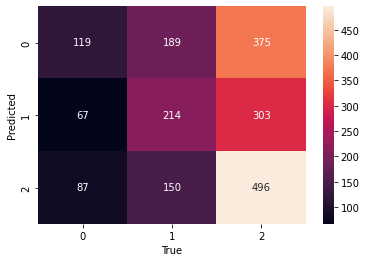

In [ ]:
sns.heatmap(confusion_matrix(df_validation["broad_design"],df_validation["y_predict_val_broad_design"]), annot=True, fmt='.3g')
plt.xlabel('True') # x-axis label with fontsize 15
plt.ylabel('Predicted')


Predicted label: one_piece while real label: one_piece
--------------------------------------------------------------------------------------------------------------------------------------
Predicted label: formal while real label: formal
--------------------------------------------------------------------------------------------------------------------------------------
Predicted label: Print while real label: Knit Full name: Perforated_Knit_Dress
--------------------------------------------------------------------------------------------------------------------------------------


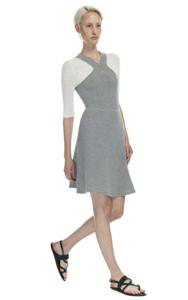

In [ ]:
##Show result
n=np.random.randint(2000)
print("Predicted label: "+list(df_validation["y_predict_val_dress_type"])[n]+" while real label: "+list(df_validation["dress_type"])[n])
print("--------------------------------------------------------------------------------------------------------------------------------------")

print("Predicted label: "+list(df_validation["y_predict_val_dress_occassion"])[n]+" while real label: "+list(df_validation["dress_ocassion"])[n])
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Predicted label: "+list(df_validation["y_predict_val_broad_design"])[n]+" while real label: "+list(df_validation["broad_design"])[n],"Full name: "+list(df_validation["image_path"])[n].split("/")[3])
print("--------------------------------------------------------------------------------------------------------------------------------------")

PIL.Image.open(list(df_validation["image_path"])[n])


In [ ]:
df_validation["y_predict_val1"].unique()

array([0, 2, 1])

In [ ]:
PIL.Image.open(list(df_validation[df_validation["y_predict_val_broad_design"]=="Striped"]["image_path"])[4])


IndexError: ignored